# url of this notebook (Introduction to Machine Learning with SciKit Learn Jupyter Notebook): http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Introduction%20to%20Machine%20Learning.ipynb 

In this course we will be focusing on very practical hands on applications of machine learning using the SciKit Learn module for Python.

Install it using either pip install scikit-learn or conda install scikit-learn depending on your installation.

You can treat each lecture almost like a micro-project. In each lecture we'll get a brief overview of the mathematics behind the model we'll work with and then dive into the code.


# What you can expect to learn from the machine learning section of this course:
I've geared this sectionof the course with one main goal in mind: you having a basic understanding of the mathematics behind some machine learning techniques and more importantly: being able to use the scikit learn library with Python to implement those techniques.


# Once you're done with this course you should feel comfortable putting SciKit Learn on your resume.¶
Machine Learning is a very broad topic and we relistically won't be able to cover every thing, especially the higher level mathematics of some methods, but you should have enough material presented here to feel confident in your ability to look at a dataset, choose a model, and then know how to apply SciKit Learn to analyze your data.

There are many free online resources to further expand your knowledge on Machine Learning. I've listed a few of the ones I personally recommend here:


# Free Additional Online Resource for Machine Learning:¶
1.) SciKit Learn's own Documentation is fantastic! They have their own basic tutorial:

SciKit Learn Tutorial

2.) Nice Introduction Overview from Toptal

3.) This free online book by Stanford professor Nils J. Nilsson.

3.) Andrew Ng's Machine Learning Class

notes

Coursera Video

Andrew Ng's class delves very nicely into the mathematics of a lot of machine learning. They are also available on youtube for free. Note: He does not use the scikit learn library or the Python language.



# How I suggest you proceed throughout the machine learning section of this course:¶
1.) Watch the lecture videos here on Udemy and learn about the overview of the mathematics and how to implemenent SciKit Learn.

2.) If you're still interested in the deep mathematics- go ahead and look up the corresponding sections in the above resources.

# Supervised Learning: Linear Regression
In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the wikipedia page and also check out Andrew Ng's wonderful lectures for free on youtube.

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.
Step 2: Visualizing current data.
Step 3: The mathematics behind the Least Squares Method.
Step 4: Using Numpy for a Univariate Linear Regression.
Step 5: Getting the error.
Step 6: Using scikit learn to implement a multivariate regression.
Step 7: Using Training and Validation.  
Step 8: Predicting Prices
Step 9 : Residual Plots


# Step 1: Getting and setting up the data.¶
We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as mpl
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [3]:
from sklearn.datasets import load_boston

In [4]:
#download the housing dataset
boston = load_boston()

In [5]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

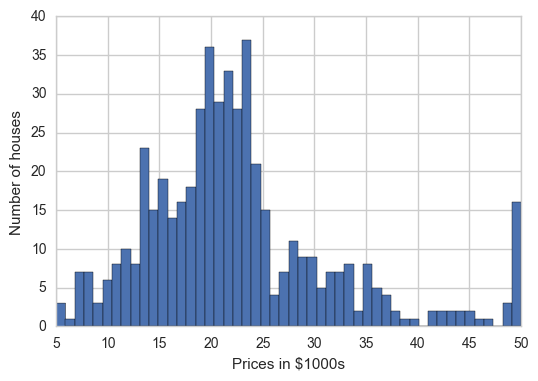

In [6]:
mpl.hist(boston.target,bins=50)

mpl.xlabel("Prices in $1000s")
mpl.ylabel("Number of houses")

# there is a median in between 20-25 1000's dolloar. 

Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

In [7]:
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

#this is plotting the 6th attribute/column or the index[5] attribute (the average number of rooms) vs the price (the target) of the houses in boston

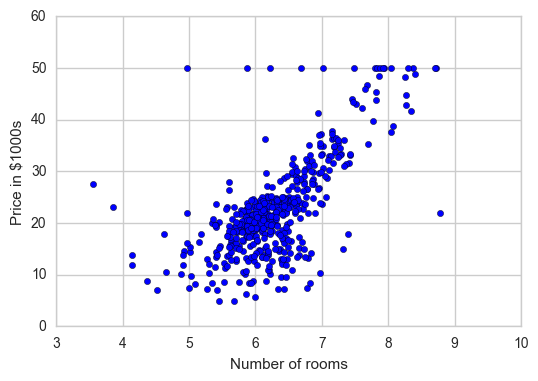

In [8]:
mpl.scatter(boston.data[:,5],boston.target)

mpl.ylabel('Price in $1000s')
mpl.xlabel("Number of rooms")

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

1.) Use pandas to transform the boston dataset into a DataFrame: 

2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [10]:
# reset the data as pandas dataframe
boston_df = DataFrame(boston.data)

#label the columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.

In [11]:
#set the price for target
boston_df["Price"] = boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now, you might be reminded of the seaborn lmplot function we used during the visualization lectures. You could use it here to do a linear fit automatically!

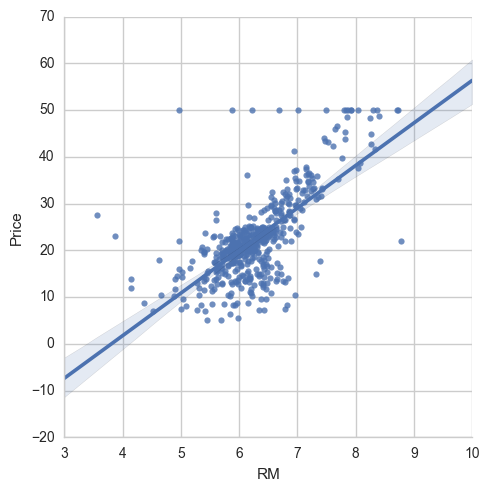

In [13]:
#use seaborn to create a linear fit
sns.lmplot("RM", "Price", data=boston_df)

However, we won't be able to do this when we move to more complicated regression models, so we'll stay focused on using the scikit learn library!

# Step 3: The mathematics behind the Least Squares Method.
In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

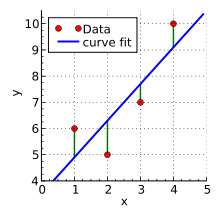

In [14]:
# Quick display of image from wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
D21+D22+D23+D24+....+D2N
D12+D22+D32+D42+....+DN2
So how do we find this line? The least-square line approximating the set of points:

(X,Y)1,(X,Y)2,(X,Y)3,(X,Y)4,(X,Y)5,
(X,Y)1,(X,Y)2,(X,Y)3,(X,Y)4,(X,Y)5,
has the equation:
Y=a0+a1X
Y=a0+a1X
this is basically just a rewritten form of the standard equation for a line:
Y=mx+b
Y=mx+b
We can solve for these constants a0 and a1 by simultaneously solving these equations:
ΣY=a0N+a1ΣX
ΣY=a0N+a1ΣX
ΣXY=a0ΣX+a1ΣX2
ΣXY=a0ΣX+a1ΣX2
These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great video.

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.

Step 4: Using Numpy for a Univariate Linear Regression
Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.


In [15]:
#set up x as median room values
X = boston_df.RM

# use v to make x a two-dimensional
X = np.vstack(boston_df.RM)

# set up Y as the target price of the houses.
Y = boston_df.Price


Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:
y=mx+b
which we can rewrite using matrices:
y=Ap
where:
A=[x1]
and
p=[mb]

This is the same as the first equation if you carry out the linear algebra. So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [18]:
#create the X array in the form of [X 1]

X = np.array([[value,1] for value in X])

Great! Now we can get the best fit values!

In [20]:
#Now get out ma and b values for our best fit line
m, b = np.linalg.lstsq(X,Y)[0]
(m, b), residuals, rank, s = np.linalg.lstsq(X,Y)

In [21]:
print((m,b),residuals,rank,s)

(9.1021089811803133, -34.670620776438575) [ 22061.87919621] 2 [ 143.99484122    2.46656609]


In [22]:
print (m,b)

9.10210898118 -34.6706207764


Finally let's plot it all together! Note that we use the original format of the boston information. We only did our matrix transformations to utilize the numpy least square method.

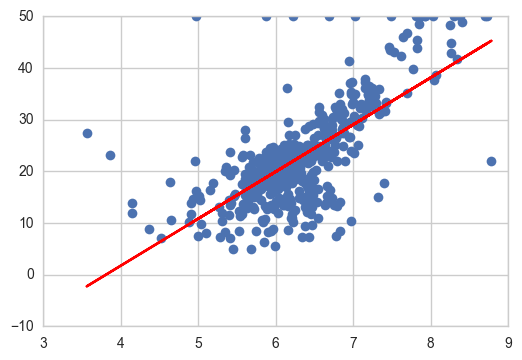

In [23]:
#first the original points, Price vs Avg  Number of Rooms
mpl.plot(boston_df.RM, boston_df.Price,"o")

# Next the best fit line
x = boston_df.RM
mpl.plot(x, m*x+b, "r", label="Best Fit Line")

In [24]:
#Get the resulting array
result = np.linalg.lstsq(X,Y)

#Get the total error
error_total = result[1]

#Get the root mean square error
rmse = np.sqrt(error_total/len(X))

print ("The root mean squared error was %.2f" %rmse)

The root mean squared error was 6.60


Normal Standard Deviation: 
    For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this link.

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

## Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. 

It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.


In [26]:
#Create a LinearRegression Object

lreg = LinearRegression()

The Coefficient of Determination (R^2):
    how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it here

We'll start the multi variable regression analysis by seperating our boston dataframe into the data columns and the target columns:

In [27]:
#Data Columns
# to drop a column, you need to pass an index[1]
#where 1 is the axis number (0 for rows and 1 for columns.)
X_multi = boston_df.drop("Price",1)

#Targets
Y_target = boston_df.Price

Finally, we're ready to pass the X and Y using the linear regression object.


In [28]:
#Implement Linear Regression
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#we created a linear regression fit 

In [30]:
print ("The estimated intercept coefficient is %.2f" %lreg.intercept_)

print ("The number of coefficients used was %d" %len(lreg.coef_))

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


Great! So we have basically made an equation for a line, but instead of just oneo coefficient m and an intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the documentation for this equation:

y(w,x)=w0+w1x1+...+wpxp
Where
w=(w1,...wp)
as the coefficients and
w0
as the intercept

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients obtained form the linear regression.

In [33]:
# set a DataFrame from the features
coeff_df = DataFrame(boston_df.columns)
#make a dataframe using the columns from the boston_df dataframe
coeff_df.columns = ["Features"]
#then name the columns of the new dataframe coeff_df features

#set a new colum lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

coeff_df






,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!



Step 7: Using Training and Validation
In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters here

In [34]:
# grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

# X is the column of room number of the boston_df

Let's go ahead and see what the output of the train_test_split was:

In [35]:
#Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

## Step 8: Predicting Prices¶
Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [36]:
#create our regression object
lreg = LinearRegression()

#Once again do a linear regression, except only on the 
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now run a prediction on both the X training set and the testing set.

In [38]:
#Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [40]:
pred_train

array([ 19.15435735,  19.04038103,  26.92228198,  22.17911355,
        20.37302724,  19.41737963,  23.16106339,  14.93723348,
        14.06925996,  23.10845894,  21.60923195,  19.08421807,
        21.60046454,  19.27710108,  28.03574296,  18.57570833,
        22.56487956,  23.72217759,  22.1265091 ,  24.14301323,
        22.17911355,  19.82944786,  21.63553418,  27.55353545,
        20.97797848,  20.6185147 ,  28.76343793,  16.81345907,
        38.31114665,  21.31114003,  21.63553418,  44.54477465,
        33.49783895,  27.4132569 ,  18.33022087,  20.19767905,
        34.28690578,  25.69484468,  22.00376537,  23.44162049,
        22.09143946,  40.99397389,  24.01150209,  27.39572208,
        30.74487243,  13.03470566,  29.06152984,  27.47462876,
        24.32712883,  30.12238637,  22.8892737 ,  24.00273468,
        25.34414831,  28.71960088,  22.67885588,  18.86503284,
        23.8273865 ,  14.82325716,  19.46998408,  22.27555505,
         1.43542317,  30.49938497,  44.06256714,  12.21

Now we will get the mean square error

In [39]:
print ("Fit a model X_train, and calculate MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2))

print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate MSE with Y_train: 45.89
Fit a model X_train, and calculate MSE with X_test and Y_test: 37.06


It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

## Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

Residual=Observedvalue−Predictedvalue


You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great link

url for residual ploting: http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis

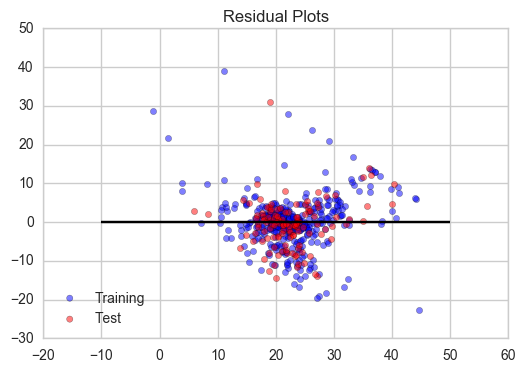

In [41]:
#scatter plot the training data
train = mpl.scatter(pred_train, (Y_train-pred_train), c="b", alpha=0.5)

#scatter plot the testing data
test = mpl.scatter(pred_test, (Y_test-pred_test), c="r",alpha=0.5)

#plot the horizontal axis line at 0
mpl.hlines(y=0, xmin=-10, xmax=50)

#labels
mpl.legend((train,test),("Training","Test"),loc="lower left")
mpl.title("Residual Plots")

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

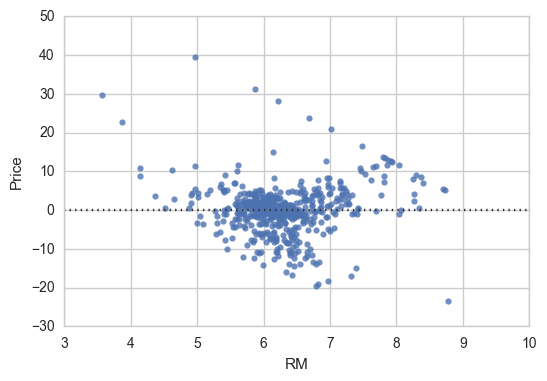

In [43]:
#Residual plot of all the dataset using seaborn
sns.residplot("RM", "Price", data=boston_df)

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here: http://scikit-learn.org/stable/modules/linear_model.html#linear-model